- Step motor cannot move more than about 1/4 cm per second, which means a single transducer cannot receive a transmitted signal in the next step

- We need to find out actual distance travelled per step - claim is 40 micrometres per step, but when measured with a ruler, it falls short of the inputted distance.



Half angle of flat transducer is given by $\alpha = 2*\arcsin{.514c/fD}$, where $\alpha$ $c$ is speed of sound in medium, $f$ the frequency of transducer, $D$ element diameter.

In [1]:
from data_analysis import Signal
import matplotlib.pyplot as plt
import numpy as np
from os import listdir, mkdir, getcwd
from os.path import isfile, isdir, join, dirname
from scope import Scope
from scanning import Scan, bscan, load_arr, move, d2s

In [2]:
c = 1498 ## speed of sound of water, m/s
f = 2.25e6 ## frequency of transducer, 
D = .0125 ## diameter of transducer
RHS = np.arcsin(.514*c/f/D)
alpha = RHS*180/np.pi
print('half opening angle: {} degrees'.format(alpha))
## find surface area covered
A = .09 ## metres
print('Area covered on sample surface {0}m depth: {1}'.format(A,A*np.tan(alpha)))
A1 = .15
print('Area covered on sample surface {0}m depth: {1}'.format(A1, A1*np.tan(alpha)))

half opening angle: 1.5687700820571941 degrees
Area covered on sample surface 0.09m depth: 44.41708109356213
Area covered on sample surface 0.15m depth: 74.02846848927021


In [3]:
A9 = .09 ## sample depth, metres
A15 = .15  ## sample depth, metres

## 3 inch focused transducer half angle and beam spread
F = 0.0762  ## focal depth, metres
D = .0125  ## element diameter
alpha3 = 90 - 180/np.pi*(np.arctan(F/(D/2)))
print('3 in angle: {}'.format(alpha3))
alpha3 = np.deg2rad(alpha3)
print('3 in, beam spreads 9cm: {0}, 15cm: {1}'.format((.09-F)*np.tan(alpha3), (.15-F)*np.tan(alpha3)))
## 1.5 inch focused transducer half angle and beam spread
F = 0.0762/2  ## focal depth, metres
D = .015  ## element diameter
alpha15 = 90 - 180/np.pi*(np.arctan(F/(D/2)))
print('1.5 in angle: {}'.format(alpha15))
alpha15 = np.deg2rad(alpha15)
print('1.5 in, beam spreads 9cm: {0}, 15cm: {1}'.format((.09-F)*np.tan(alpha15), (.15-F)*np.tan(alpha15)))

3 in angle: 4.688960871218967
3 in, beam spreads 9cm: 0.0011318897637795286, 15cm: 0.00605314960629922
1.5 in angle: 11.13630943118173
1.5 in, beam spreads 9cm: 0.010216535433070868, 15cm: 0.022027559055118117


This calculation is purely geometrical, it has no dependence on frequency. For the flat transducer calculation, higher frequency (as well as larger element diameter) reduces beam spread.

In [4]:
## pass the path to data and the file type (.npy, .npz, or .csv)
fpath = "C:\\Users\\dionysius\\Desktop\\PURE\\pure\\data\\30deg\\3FOC5in"
f = Signal(fpath, ftype='npy')

In [5]:
print(type(f.signal_data))
np.shape(f.signal_data)  ## (angle, # of points, time or voltage)

<class 'numpy.ndarray'>


(36, 20000, 2)

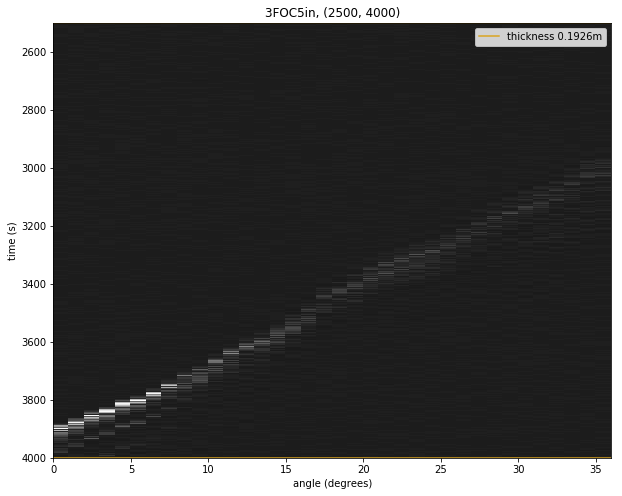

In [6]:
f.ang_bscan((2500,4000))

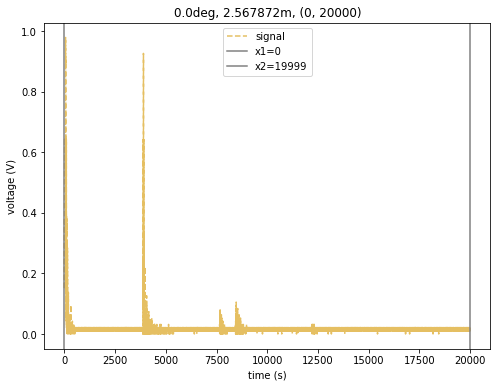

In [ ]:
f.analyze_peak(0, 0, -1)

To find the index corresponding to a certain distance from transducer, we create a function defined as such.

In [ ]:
tstep = 3.999999999997929e-08
def dist_ind(dist):
     ## distance in water
     v_w = 1498
     t = 2*dist/v_w
     ind = t//tstep
     return int(ind), t

print('9 cm:\t',dist_ind(.09)[0])
print('15 cm:\t', dist_ind(.15)[0])